In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import requests
import json
%matplotlib inline

In [16]:
df = pd.read_csv('byStation.csv')
df.columns = ['STATION','DATE','ENTRIES','EXITS']
# df_final = pd.read_pickle('df_final.pickle')
df_final = pd.read_pickle('df_final_update.pickle')


In [17]:
df_final.head()

,STATION,DATE,ENTRIES,EXITS,name,weekday,lat,long,volume
0,1 AV,01/01/2018,8427,9924,1st Ave,0,40.730975,-73.981681,18351
1,1 AV,01/02/2018,18668,21328,1st Ave,1,40.730975,-73.981681,39996
2,1 AV,01/03/2018,20417,22357,1st Ave,2,40.730975,-73.981681,42774
3,1 AV,01/04/2018,12010,13472,1st Ave,3,40.730975,-73.981681,25482
4,1 AV,01/05/2018,18891,21966,1st Ave,4,40.730975,-73.981681,40857


In [18]:
df_final['weekday'] = pd.to_datetime(df_final['DATE']).dt.weekday
# df_final['Volume'] = df_final.ENTRIES + df_final.EXITS
df_final.head()

,STATION,DATE,ENTRIES,EXITS,name,weekday,lat,long,volume
0,1 AV,01/01/2018,8427,9924,1st Ave,0,40.730975,-73.981681,18351
1,1 AV,01/02/2018,18668,21328,1st Ave,1,40.730975,-73.981681,39996
2,1 AV,01/03/2018,20417,22357,1st Ave,2,40.730975,-73.981681,42774
3,1 AV,01/04/2018,12010,13472,1st Ave,3,40.730975,-73.981681,25482
4,1 AV,01/05/2018,18891,21966,1st Ave,4,40.730975,-73.981681,40857


In [8]:
# from scipy import stats
# import numpy as np
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [19]:
# byMed = df_final.groupby('STATION').median()
# byMedWeekend = df_final[df_final.weekday>4].groupby('STATION').median()
byMean = df_final.groupby('STATION').mean()
byMeanWeekend = df_final[df_final.weekday>4].groupby('STATION').mean()
byMeanWeek = df_final[df_final.weekday<=4].groupby('STATION').mean()

In [21]:
byMean.sort_values('volume',ascending=False).head(30)

,ENTRIES,EXITS,weekday,lat,long,volume
STATION,,,,,,
34 ST-PENN STA,127057.491758,111318.032967,3.000000,40.750373,-73.991057,238375.524725
GRD CNTRL-42 ST,111173.670330,105393.906593,3.000000,40.751807,-73.976713,216567.576923
34 ST-HERALD SQ,87010.483516,89816.538462,3.000000,40.750373,-73.991057,176827.021978
14 ST-UNION SQ,78714.134615,75190.552198,3.000000,40.808719,-73.907657,153904.686813
23 ST,84724.524725,66607.587912,3.000000,40.884667,-73.900870,151332.112637
TIMES SQ-42 ST,72945.464286,74993.425824,3.000000,40.754612,-73.986768,147938.890110
FULTON ST,72536.118132,61153.041209,3.000000,40.677316,-73.983110,133689.159341
42 ST-PORT AUTH,69825.346154,59053.791209,3.000000,40.757308,-73.989735,128879.137363
86 ST,68711.368132,56119.618132,3.000000,40.788644,-73.976218,124830.986264


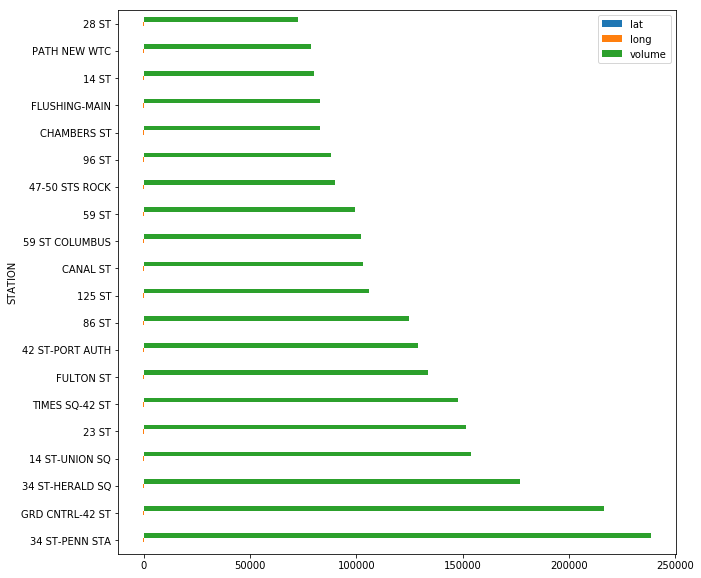

In [22]:
#volume of traffic of the top stations
plt.figure()
byMean.sort_values('volume',ascending=False).drop(['ENTRIES', 'EXITS', 'weekday'], axis = 1).head(20).plot(kind='barh', figsize=(10,10))

In [24]:
top_stations = [x for x in byMeanWeek.sort_values('volume',ascending=False).reset_index().head(30)['STATION']]
df_top_stations = byMean.reset_index()[byMean.reset_index()['STATION'].isin(top_stations)]
top_stations

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 '86 ST',
 '125 ST',
 '59 ST COLUMBUS',
 '59 ST',
 '47-50 STS ROCK',
 'CANAL ST',
 'CHAMBERS ST',
 '96 ST',
 'PATH NEW WTC',
 'FLUSHING-MAIN',
 '14 ST',
 '28 ST',
 'WALL ST',
 '50 ST',
 'LEXINGTON AV/53',
 '72 ST',
 '42 ST-BRYANT PK',
 'JKSN HT-ROOSVLT',
 'ATL AV-BARCLAY',
 'W 4 ST-WASH SQ',
 '7 AV',
 'JAMAICA CENTER']

In [25]:
byDay = df_final.groupby(['weekday','STATION']).mean()
df_top_stations_byDay = byDay.reset_index()[byDay.reset_index()['STATION'].isin(top_stations)]
df_top_stations_byDay.head()

,weekday,STATION,ENTRIES,EXITS,lat,long,volume
9,0,125 ST,62199.403846,49354.269231,40.807754,-73.945495,111553.673077
13,0,14 ST,45113.461538,39171.673077,40.681711,-73.837683,84285.134615
14,0,14 ST-UNION SQ,82629.153846,77584.692308,40.808719,-73.907657,160213.846154
46,0,23 ST,94477.230769,73660.788462,40.884667,-73.900870,168138.019231
52,0,28 ST,40945.000000,38786.807692,40.884667,-73.900870,79731.807692


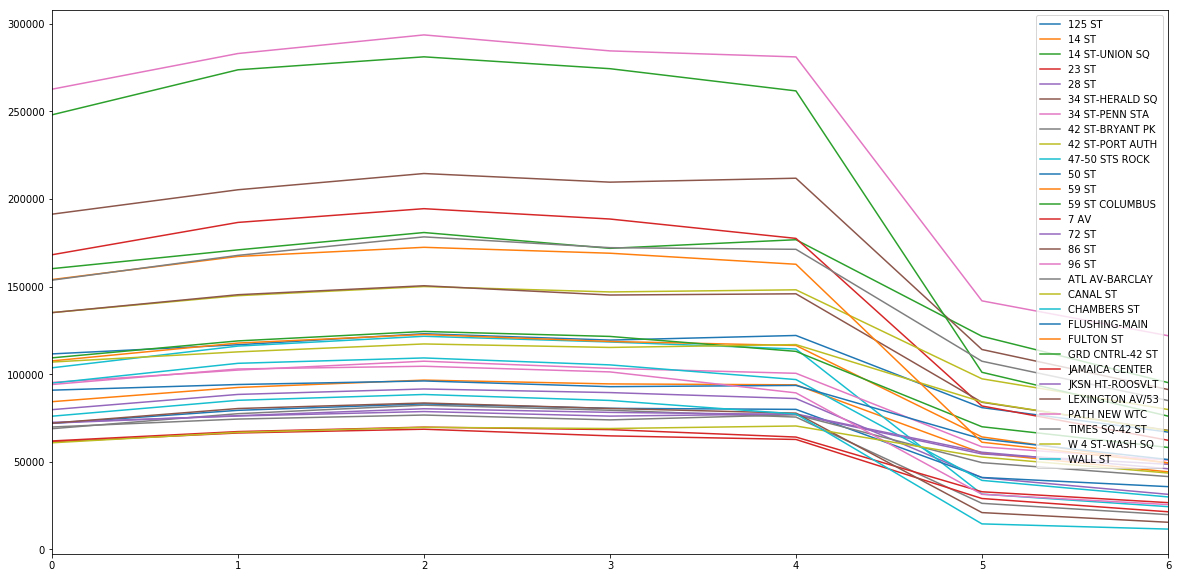

In [26]:
#plot the volume of traffic for every day

traffic = []
weekdays = [0, 1, 2, 3, 4, 5, 6]
stationNames = [x for x in df_top_stations_byDay[df_top_stations_byDay['weekday'] == 0]["STATION"]]


for day in weekdays:
    traffic.append([x for x in df_top_stations_byDay[df_top_stations_byDay['weekday'] == day].reset_index()["volume"]])

df = pd.DataFrame(traffic, index=weekdays, columns=stationNames)
df.plot(figsize = (20,10))

In [31]:
# stations = df_final.groupby(["STATION"], sort=False, as_index=False)["geo"].first()

stations = df_final.groupby(['STATION'], sort=False, as_index=False)[['lat','long']].first()
stations['geo'] = list(zip(stations.lat, stations.long))
stations.head()

,STATION,lat,long,geo
0,1 AV,40.730975,-73.981681,"(40.7309749758, -73.9816808749)"
1,103 ST,40.799446,-73.968379,"(40.7994460003, -73.9683789996)"
2,103 ST-CORONA,40.799446,-73.968379,"(40.7994460003, -73.9683789996)"
3,104 ST,40.681711,-73.837683,"(40.6817110011, -73.8376830006)"
4,110 ST,40.795020,-73.944250,"(40.7950200001, -73.9442499969)"


In [33]:
def latlong(geo):
    lat = str(geo[0])
    long = str(geo[1])
    url = 'http://data.fcc.gov/api/block/find?format=json&latitude='+lat+'&longitude='+long+'&showall=false'
    resp = requests.get(url)

    result = resp.json()['Block']['FIPS'][:11]
    return(result)

In [34]:
#takes ~20min or more to geocode
stations['CensusTract'] = stations['geo'].apply(latlong)
stations

,STATION,lat,long,geo,CensusTract
0,1 AV,40.730975,-73.981681,"(40.7309749758, -73.9816808749)",36061003400
1,103 ST,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",36061019100
2,103 ST-CORONA,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",36061019100
3,104 ST,40.681711,-73.837683,"(40.6817110011, -73.8376830006)",36081009400
4,110 ST,40.795020,-73.944250,"(40.7950200001, -73.9442499969)",36061017200
5,111 ST,40.684331,-73.832163,"(40.684331, -73.8321629985)",36081009600
6,116 ST,40.802098,-73.949625,"(40.8020979991, -73.949625001)",36061019000
7,116 ST-COLUMBIA,40.807722,-73.964110,"(40.8077220012, -73.9641099976)",36061020500
8,121 ST,40.700482,-73.828349,"(40.7004819985, -73.8283490002)",36081014400
9,125 ST,40.807754,-73.945495,"(40.8077539992, -73.9454950001)",36061020000


In [35]:
stations.to_pickle("stations.pickle")

In [36]:
# Open Census data
demographics = pd.read_csv("./data/nyc_census_tracts.csv")
stations['CensusTract'] = pd.to_numeric(stations['CensusTract'])
demographics['CensusTract'] = pd.to_numeric(demographics['CensusTract'])

demographics.head(10)

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
5,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,4.3,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2
6,36005002300,Bronx,Bronx,4774,2130,2644,62.3,0.2,36.5,1.0,...,14.0,1.5,4.1,42.7,1191,74.2,16.1,9.7,0.0,18.9
7,36005002400,Bronx,Bronx,150,109,41,0.0,52.0,48.0,0.0,...,0.0,0.0,0.0,NaN,113,62.8,37.2,0.0,0.0,0.0
8,36005002500,Bronx,Bronx,5355,2338,3017,76.5,1.5,18.9,0.0,...,17.7,1.8,2.7,35.5,1691,85.1,8.3,6.1,0.5,9.4
9,36005002701,Bronx,Bronx,3016,1375,1641,68.0,0.0,31.2,0.0,...,18.0,0.0,1.6,42.8,1102,86.9,8.5,4.5,0.0,15.2


In [37]:
#merge MTA and Census data

mergeded_MTA_census = pd.merge(stations, demographics, on='CensusTract', how='left')
mergeded_MTA_census.head(5)

,STATION,lat,long,geo,CensusTract,County,Borough,TotalPop,Men,Women,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1 AV,40.730975,-73.981681,"(40.7309749758, -73.9816808749)",36061003400,New York,Manhattan,6476,3163,3313,...,25.5,8.3,6.0,30.0,4480,86.9,4.9,7.9,0.4,5.1
1,103 ST,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",36061019100,New York,Manhattan,9545,4107,5438,...,14.2,3.8,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0
2,103 ST-CORONA,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",36061019100,New York,Manhattan,9545,4107,5438,...,14.2,3.8,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0
3,104 ST,40.681711,-73.837683,"(40.6817110011, -73.8376830006)",36081009400,Queens,Queens,2962,1443,1519,...,9.9,0.0,2.6,48.0,1386,80.0,12.1,7.0,0.9,11.3
4,110 ST,40.795020,-73.944250,"(40.7950200001, -73.9442499969)",36061017200,New York,Manhattan,5655,3075,2580,...,11.4,3.2,7.3,32.0,2578,76.9,9.9,11.2,2.0,13.1


In [60]:
mergeded_MTA_census[mergeded_MTA_census.STATION=='34 ST-PENN STA']

,STATION,lat,long,geo,CensusTract,County,Borough,TotalPop,Men,Women,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
61,34 ST-PENN STA,40.750373,-73.991057,"(40.750373, -73.9910569991)",36061010100,New York,Manhattan,1259,758,501,...,38.3,7.4,7.9,23.6,932,90.7,3.6,5.7,0.0,5.7


In [38]:
mergeded_MTA_census2 = pd.merge(byMean.reset_index(), mergeded_MTA_census, on='STATION', how='left')
mergeded_MTA_census2

,STATION,ENTRIES,EXITS,weekday,lat_x,long_x,volume,lat_y,long_y,geo,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1 AV,16640.285714,17975.576923,3.000000,40.730975,-73.981681,34615.862637,40.730975,-73.981681,"(40.7309749758, -73.9816808749)",...,25.5,8.3,6.0,30.0,4480,86.9,4.9,7.9,0.4,5.1
1,103 ST,24898.337912,15611.291209,3.000000,40.799446,-73.968379,40509.629121,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",...,14.2,3.8,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0
2,103 ST-CORONA,16990.513736,10904.483516,3.000000,40.799446,-73.968379,27894.997253,40.799446,-73.968379,"(40.7994460003, -73.9683789996)",...,14.2,3.8,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0
3,104 ST,2476.923077,701.524725,3.000000,40.681711,-73.837683,3178.447802,40.681711,-73.837683,"(40.6817110011, -73.8376830006)",...,9.9,0.0,2.6,48.0,1386,80.0,12.1,7.0,0.9,11.3
4,110 ST,9581.337912,6975.239011,3.000000,40.795020,-73.944250,16556.576923,40.795020,-73.944250,"(40.7950200001, -73.9442499969)",...,11.4,3.2,7.3,32.0,2578,76.9,9.9,11.2,2.0,13.1
5,111 ST,14248.604396,7461.909341,3.000000,40.684331,-73.832163,21710.513736,40.684331,-73.832163,"(40.684331, -73.8321629985)",...,2.0,1.3,0.7,44.5,1896,79.4,14.4,6.2,0.0,9.9
6,116 ST,27996.310440,13333.620879,3.000000,40.802098,-73.949625,41329.931319,40.802098,-73.949625,"(40.8020979991, -73.949625001)",...,6.8,3.1,4.0,34.9,1547,78.9,14.6,6.5,0.0,4.8
7,116 ST-COLUMBIA,11141.475275,5901.060440,3.000000,40.807722,-73.964110,17042.535714,40.807722,-73.964110,"(40.8077220012, -73.9641099976)",...,40.1,3.2,14.0,24.2,1740,86.3,5.2,8.4,0.0,5.1
8,121 ST,862.560440,451.771978,3.000000,40.700482,-73.828349,1314.332418,40.700482,-73.828349,"(40.7004819985, -73.8283490002)",...,2.9,3.2,0.5,42.9,777,75.7,13.3,11.1,0.0,9.1
9,125 ST,58333.401099,47489.258242,3.000000,40.807754,-73.945495,105822.659341,40.807754,-73.945495,"(40.8077539992, -73.9454950001)",...,9.4,0.7,9.3,32.4,1783,72.6,12.6,14.8,0.0,3.1


In [39]:
mergeded_MTA_census_top = mergeded_MTA_census2[mergeded_MTA_census2['STATION'].isin(top_stations)].reset_index().drop(['index'], axis = 1)
mergeded_MTA_census_top

,STATION,ENTRIES,EXITS,weekday,lat_x,long_x,volume,lat_y,long_y,geo,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,125 ST,58333.401099,47489.258242,3.000000,40.807754,-73.945495,105822.659341,40.807754,-73.945495,"(40.8077539992, -73.9454950001)",...,9.4,0.7,9.3,32.4,1783,72.6,12.6,14.8,0.0,3.1
1,14 ST,42314.082418,37803.851648,3.000000,40.681711,-73.837683,80117.934066,40.681711,-73.837683,"(40.6817110011, -73.8376830006)",...,9.9,0.0,2.6,48.0,1386,80.0,12.1,7.0,0.9,11.3
2,14 ST-UNION SQ,78714.134615,75190.552198,3.000000,40.808719,-73.907657,153904.686813,40.808719,-73.907657,"(40.8087190009, -73.9076569994)",...,14.6,3.5,0.0,40.1,722,79.2,10.2,10.5,0.0,6.6
3,23 ST,84724.524725,66607.587912,3.000000,40.884667,-73.900870,151332.112637,40.884667,-73.900870,"(40.8846670006, -73.9008700002)",...,14.1,1.1,2.9,38.2,1251,68.5,20.6,10.9,0.0,12.5
4,28 ST,36918.604396,35594.884615,3.000000,40.884667,-73.900870,72513.489011,40.884667,-73.900870,"(40.8846670006, -73.9008700002)",...,14.1,1.1,2.9,38.2,1251,68.5,20.6,10.9,0.0,12.5
5,34 ST-HERALD SQ,87010.483516,89816.538462,3.000000,40.750373,-73.991057,176827.021978,40.750373,-73.991057,"(40.750373, -73.9910569991)",...,38.3,7.4,7.9,23.6,932,90.7,3.6,5.7,0.0,5.7
6,34 ST-PENN STA,127057.491758,111318.032967,3.000000,40.750373,-73.991057,238375.524725,40.750373,-73.991057,"(40.750373, -73.9910569991)",...,38.3,7.4,7.9,23.6,932,90.7,3.6,5.7,0.0,5.7
7,42 ST-BRYANT PK,30123.506887,31209.195592,2.997245,40.754184,-73.984591,61332.702479,40.754184,-73.984591,"(40.7541840013, -73.984590999)",...,51.9,0.0,3.7,17.9,108,95.4,4.6,0.0,0.0,0.0
8,42 ST-PORT AUTH,69825.346154,59053.791209,3.000000,40.757308,-73.989735,128879.137363,40.757308,-73.989735,"(40.7573079986, -73.9897350009)",...,55.9,4.6,15.6,16.5,379,79.9,2.1,17.9,0.0,12.9
9,47-50 STS ROCK,42932.348901,47049.876374,3.000000,40.758641,-73.981331,89982.225275,40.758641,-73.981331,"(40.7586410016, -73.9813310023)",...,58.6,0.0,7.8,25.7,116,100.0,0.0,0.0,0.0,4.1


In [53]:
mergeded_MTA_census2.to_pickle('merged_MTA_final.pickle')

Text(0,0.5,'Station')

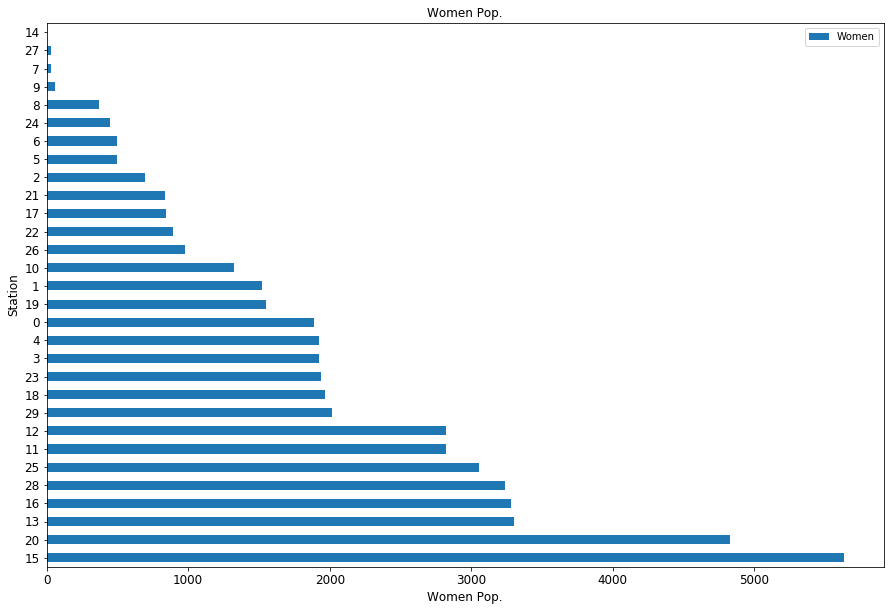

In [40]:
#filter merged data for top stations in volume of traffic
plt.figure()

ax = mergeded_MTA_census_top[['Women','STATION']].sort_values('Women',ascending=False).plot(kind='barh', title ="Women Pop.",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Women Pop.",fontsize=12)
ax.set_ylabel("Station",fontsize=12)

Text(0,0.5,'Station')

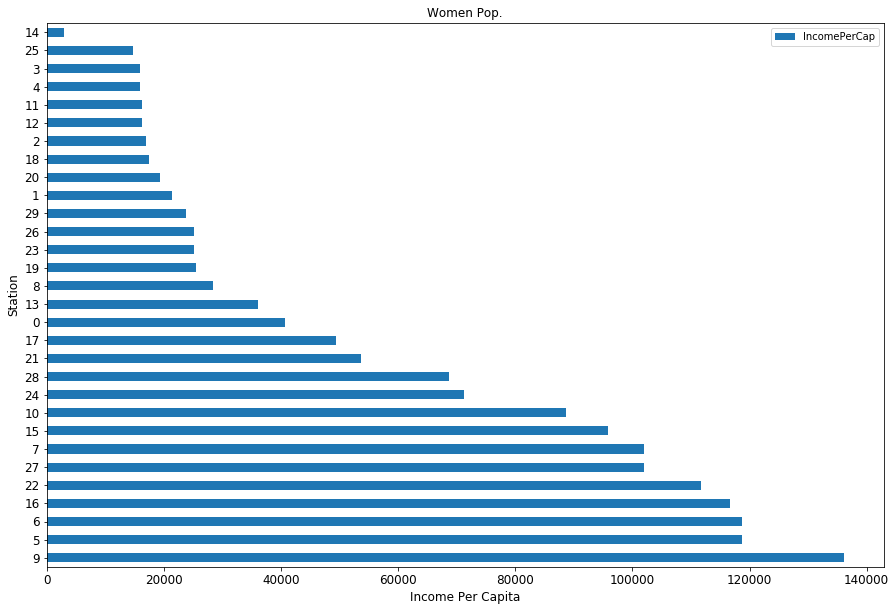

In [41]:
plt.figure()

ax = mergeded_MTA_census_top[['IncomePerCap','STATION']].sort_values('IncomePerCap',ascending=False).plot(kind='barh', title ="Women Pop.",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Income Per Capita",fontsize=12)
ax.set_ylabel("Station",fontsize=12)

In [42]:
normalized_df = pd.DataFrame()
normalized_df['Station'] = mergeded_MTA_census_top['STATION']

In [45]:
normalized_df['volume']=(mergeded_MTA_census_top['volume']-mergeded_MTA_census_top['volume'].min())/(mergeded_MTA_census_top['volume'].max()-mergeded_MTA_census_top['volume'].min())

In [46]:
normalized_df['Income']=(mergeded_MTA_census_top['IncomePerCap']-mergeded_MTA_census_top['IncomePerCap'].min())/(mergeded_MTA_census_top['IncomePerCap'].max()-mergeded_MTA_census_top['IncomePerCap'].min())

In [47]:
normalized_df['Women']=(mergeded_MTA_census_top['Women']-mergeded_MTA_census_top['Women'].min())/(mergeded_MTA_census_top['Women'].max()-mergeded_MTA_census_top['Women'].min())

In [50]:
normalized_df['rank_score'] = 3*normalized_df['volume'] + 2*normalized_df['Income'] + 2*normalized_df['Women']

In [51]:
normalized_df

,Station,volume,Income,Women,rank_score
0,125 ST,0.283105,0.283859,0.334874,2.086778
1,14 ST,0.144084,0.138567,0.269108,1.247601
2,14 ST-UNION SQ,0.543150,0.105659,0.123000,2.086769
3,23 ST,0.529237,0.097094,0.340562,2.463021
4,28 ST,0.102956,0.097094,0.340562,1.184179
5,34 ST-HERALD SQ,0.667123,0.869976,0.088162,3.917643
6,34 ST-PENN STA,1.000000,0.869976,0.088162,4.916275
7,42 ST-BRYANT PK,0.042486,0.744061,0.004444,1.624468
8,42 ST-PORT AUTH,0.407803,0.190777,0.064700,1.734360
9,47-50 STS ROCK,0.197434,1.000000,0.010132,2.612564


In [52]:
normalized_df.sort_values(by =['rank_score'], ascending=False)

,Station,volume,Income,Women,rank_score
6,34 ST-PENN STA,1.000000,0.869976,0.088162,4.916275
22,GRD CNTRL-42 ST,0.882054,0.817330,0.158194,4.597212
15,86 ST,0.385909,0.697171,1.000000,4.552067
5,34 ST-HERALD SQ,0.667123,0.869976,0.088162,3.917643
16,96 ST,0.188444,0.854401,0.582296,3.438725
27,TIMES SQ-42 ST,0.510885,0.744061,0.004444,3.029663
9,47-50 STS ROCK,0.197434,1.000000,0.010132,2.612564
3,23 ST,0.529237,0.097094,0.340562,2.463021
20,FLUSHING-MAIN,0.160258,0.122466,0.857625,2.440956
21,FULTON ST,0.433817,0.380622,0.147352,2.357398
